In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

In [142]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv("../Resources/telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [143]:
df = df[df['Customer Status'] != 'Joined']


In [144]:
df['Churn Category']                    = df['Churn Category'].replace(np.nan,'satisfied')
df['Internet Type']                     = df['Internet Type'].replace(np.nan,'No service')
df['Multiple Lines']                    = df['Multiple Lines'].replace(np.nan,'NO phone Service')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,0)
df['Avg Monthly GB Download']           = df['Avg Monthly GB Download'].replace(np.nan,0)
df['Multiple Lines']                    = df['Multiple Lines'].replace(np.nan,'No service')
df['Internet Service']                  = df['Internet Service'].replace(np.nan,'No service')
df['Online Security']                   = df['Online Security'].replace(np.nan,'No service')
df['Online Backup']                     = df['Online Backup'].replace(np.nan,'No service')
df['Device Protection Plan']            = df['Device Protection Plan'].replace(np.nan,'No service')
df['Premium Tech Support']              = df['Premium Tech Support'].replace(np.nan,'No service')
df['Streaming TV']                      = df['Streaming TV'].replace(np.nan,'No service')
df['Streaming Music']                   = df['Streaming Music'].replace(np.nan,'No service')
df['Unlimited Data']                    = df['Unlimited Data'].replace(np.nan,'No service')
df['Streaming Movies']                  = df['Streaming Movies'].replace(np.nan,'No service')

In [145]:
df = df.drop(['Customer ID','Churn Reason','Total Refunds','Zip Code','Latitude','Longitude','Paperless Billing','Total Extra Data Charges','Total Revenue','City'],axis=1)
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Customer Status,Churn Category
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,No,No,Yes,One Year,Credit Card,65.6,593.30,381.51,Stayed,satisfied
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,Yes,Yes,No,Month-to-Month,Credit Card,-4.0,542.40,96.21,Stayed,satisfied
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,No,No,Yes,Month-to-Month,Bank Withdrawal,73.9,280.85,134.60,Churned,Competitor
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Yes,No,Yes,Month-to-Month,Bank Withdrawal,98.0,1237.85,361.66,Churned,Dissatisfaction
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,No,No,Yes,Month-to-Month,Credit Card,83.9,267.40,22.14,Churned,Dissatisfaction


In [146]:
mylist = list(df.select_dtypes(include=['object']).columns)
print(mylist)

for column in mylist:
    df[column] = df[column].astype('category')

['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method', 'Customer Status', 'Churn Category']


In [147]:
categorical_cols = list(df.select_dtypes(include=['category']).columns)

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [148]:
df.dtypes

Gender                                 int32
Age                                    int64
Married                                int32
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int32
Phone Service                          int32
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int32
Internet Service                       int32
Internet Type                          int32
Avg Monthly GB Download              float64
Online Security                        int32
Online Backup                          int32
Device Protection Plan                 int32
Premium Tech Support                   int32
Streaming TV                           int32
Streaming Movies                       int32
Streaming Music                        int32
Unlimited Data                         int32
Contract                               int32
Payment Me

In [149]:
df = df.reset_index(drop=True)

In [150]:
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Customer Status,Churn Category
0,0,37,1,0,2,9,0,1,42.39,1,...,0,0,2,1,1,65.6,593.30,381.51,1,5
1,1,46,0,0,0,9,0,1,10.69,2,...,2,2,0,0,1,-4.0,542.40,96.21,1,5
2,1,50,0,0,0,4,5,1,33.65,1,...,0,0,2,0,0,73.9,280.85,134.60,0,1
3,1,78,1,0,1,13,4,1,27.82,1,...,2,0,2,0,0,98.0,1237.85,361.66,0,2
4,0,75,1,0,3,3,0,1,7.38,1,...,0,0,2,0,1,83.9,267.40,22.14,0,2


In [151]:
cols = df.columns

ms = MinMaxScaler()

y = df['Customer Status']

X = ms.fit_transform(df)

X = pd.DataFrame(X, columns=[cols])

X.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Customer Status,Churn Category
0,0.0,0.295082,1.0,0.0,0.181818,0.112676,0.0,1.0,0.847970,0.5,...,0.0,0.0,1.0,0.5,0.5,0.587184,0.066288,0.107024,1.0,1.0
1,1.0,0.442623,0.0,0.0,0.000000,0.112676,0.0,1.0,0.213843,1.0,...,1.0,1.0,0.0,0.0,0.5,0.046602,0.060415,0.026989,1.0,1.0
2,1.0,0.508197,0.0,0.0,0.000000,0.042254,1.0,1.0,0.673135,0.5,...,0.0,0.0,1.0,0.0,0.0,0.651650,0.030233,0.037759,0.0,0.2
3,1.0,0.967213,1.0,0.0,0.090909,0.169014,0.8,1.0,0.556511,0.5,...,1.0,0.0,1.0,0.0,0.0,0.838835,0.140665,0.101455,0.0,0.4
4,0.0,0.918033,1.0,0.0,0.272727,0.028169,0.0,1.0,0.147630,0.5,...,0.0,0.0,1.0,0.0,0.5,0.729320,0.028681,0.006211,0.0,0.4


In [152]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [153]:
kmeans.cluster_centers_

array([[0.50660451, 0.43388063, 0.64413364, 0.07136896, 0.26333263,
        0.64676377, 0.20549081, 0.92100492, 0.47301012, 0.7033152 ,
        0.67909868, 0.6342053 , 0.2222923 , 0.54454804, 0.6017871 ,
        0.62354312, 0.56785807, 0.62328412, 0.64866615, 0.6028231 ,
        0.74423724, 0.62678063, 0.27311577, 0.57236975, 0.37865166,
        0.30895452, 0.94794095, 0.96664077],
       [0.49706745, 0.48510889, 0.30461877, 0.02675953, 0.07104772,
        0.22423692, 0.36686217, 0.87573314, 0.44201538, 0.63049853,
        0.96151026, 0.49987781, 0.278601  , 0.19886364, 0.26521261,
        0.23991935, 0.17467009, 0.33852639, 0.31176686, 0.28610704,
        0.8502566 , 0.07478006, 0.20069648, 0.59747203, 0.1366765 ,
        0.10348413, 0.38856305, 0.57272727]])

In [154]:
kmeans.inertia_

21296.269089676516

In [155]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1261 out of 6589 samples were correctly labeled.


In [156]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.19


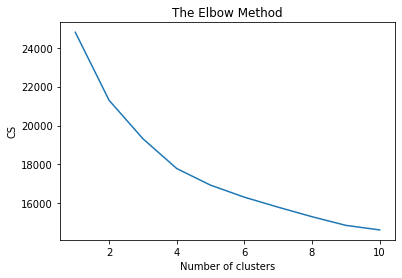

In [162]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [158]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1710 out of 6589 samples were correctly labeled.
Accuracy score: 0.26


In [159]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1315 out of 6589 samples were correctly labeled.
Accuracy score: 0.20


In [160]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 5328 out of 6589 samples were correctly labeled.
Accuracy score: 0.81


In [161]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1503 out of 6589 samples were correctly labeled.
Accuracy score: 0.23


https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook